In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import cv2
import numpy as np

GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = '3rd College/ProjectX 2020/Temporal SR'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))

GOOGLE_DRIVE_DATA_PATH = '3rd College/ProjectX 2020/Data/1979/2/'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'My Drive', GOOGLE_DRIVE_DATA_PATH)

img_list = glob.glob(GOOGLE_DRIVE_PATH + '/*')
print(img_list)

FileNotFoundError: ignored

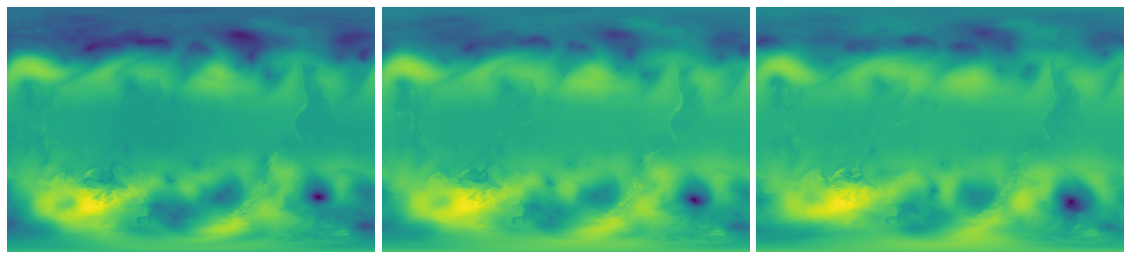

In [ ]:
'''PLOT AN EXAMPLE OF SANDWHICH FRAME'''
offset = 2
first = np.random.randint(0, len(img_list)-3*offset)
first = 1368

img_0 = np.load(img_list[first]).squeeze(2)
img_1 = np.load(img_list[first+1*offset]).squeeze(2)
img_2 = np.load(img_list[first+2*offset]).squeeze(2)


fig = plt.figure(figsize=(20., 10.))
grid = ImageGrid(fig, 111, nrows_ncols=(1, 3), axes_pad=0.1,)
for ax, im in zip(grid, [img_0, img_1, img_2]):
  ax.axis('off')
  ax.imshow(im)


plt.show()




In [ ]:
from tqdm import tqdm
from PIL import Image

input_dir = 'drive/My Drive/3rd College/ProjectX 2/Data/1979/2/'
output_dir = '/content/24/'
skip = 1
count = 0
index = 0
i = 0
for f in tqdm(img_list):
  if count == skip:
    count = 0
    
  else:
    count += 1
    # b_1 = f.rfind('/')
    # img_name = f[b_1+1:-1].replace('np','jpg')
    f = 'drive/My Drive/3rd College/ProjectX 2020/Data/1979/2/1979_{}_2.npy'.format(i)
    img = np.load(f).squeeze(2)
    img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    img = cv2.applyColorMap(img, cv2.COLORMAP_OCEAN)
    # print(output_dir + img_name)
    cv2.imwrite(output_dir + str(index) + '.jpg', img)
    index += 1
  i += 1



100%|██████████| 1460/1460 [00:27<00:00, 52.20it/s]


In [ ]:
print(img_list)

['drive/My Drive/3rd College/ProjectX 2020/Data/1979/2/1979_0_2.npy', 'drive/My Drive/3rd College/ProjectX 2020/Data/1979/2/1979_1000_2.npy', 'drive/My Drive/3rd College/ProjectX 2020/Data/1979/2/1979_1001_2.npy', 'drive/My Drive/3rd College/ProjectX 2020/Data/1979/2/1979_1002_2.npy', 'drive/My Drive/3rd College/ProjectX 2020/Data/1979/2/1979_1003_2.npy', 'drive/My Drive/3rd College/ProjectX 2020/Data/1979/2/1979_1004_2.npy', 'drive/My Drive/3rd College/ProjectX 2020/Data/1979/2/1979_1005_2.npy', 'drive/My Drive/3rd College/ProjectX 2020/Data/1979/2/1979_1006_2.npy', 'drive/My Drive/3rd College/ProjectX 2020/Data/1979/2/1979_1007_2.npy', 'drive/My Drive/3rd College/ProjectX 2020/Data/1979/2/1979_1008_2.npy', 'drive/My Drive/3rd College/ProjectX 2020/Data/1979/2/1979_1009_2.npy', 'drive/My Drive/3rd College/ProjectX 2020/Data/1979/2/1979_100_2.npy', 'drive/My Drive/3rd College/ProjectX 2020/Data/1979/2/1979_1010_2.npy', 'drive/My Drive/3rd College/ProjectX 2020/Data/1979/2/1979_1011_2.n

In [ ]:
# import moviepy.video.io.ImageSequenceClip
# movie_list = glob.glob('/content/22/*')
# clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(movie_list, fps=16)
# clip.write_videofile('/content/22/', '/content/sea_level_pressure_100.mp4')

In [ ]:
# os.system("ffmpeg -r 16 -i /content/22/1979_%d_2.jpg -vcodec mpeg4 -crf 18 -pix_fmt yuv420p -b 8M -y movie_lg.mp4")
os.system("ffmpeg -r 8 -i /content/24/%d.jpg -vcodec mpeg4 -crf 18 -pix_fmt yuv420p -b 8M -y movie_lg.mp4")

0